# **TASK 1 - IRIS FLOWER CLASSIFICATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.groupby("Species").size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**DATA VISUALIZATION**

<Axes: >

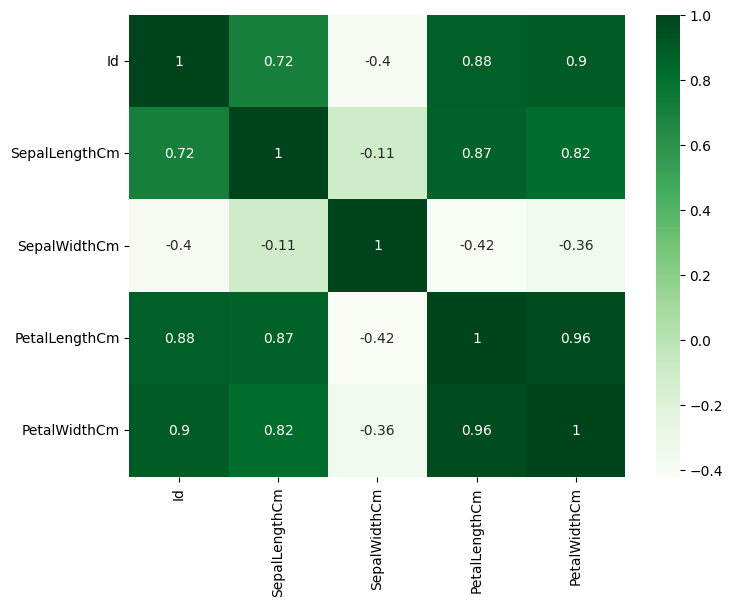

In [ ]:
corr = df.corr(numeric_only = True)
plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap="Greens")

In [ ]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)


In [ ]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()


**MODEL EVALUVATION - SVM (SUPPORT VECTOR MACHINE) CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
model1 = SVC()
model1.fit(X_train,Y_train)
pred_y = model1.predict(X_test)

print("Accuracy=",(accuracy_score(Y_test,pred_y)*100),"%")

Accuracy= 96.66666666666667 %


**CONFUSION MATRIX**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



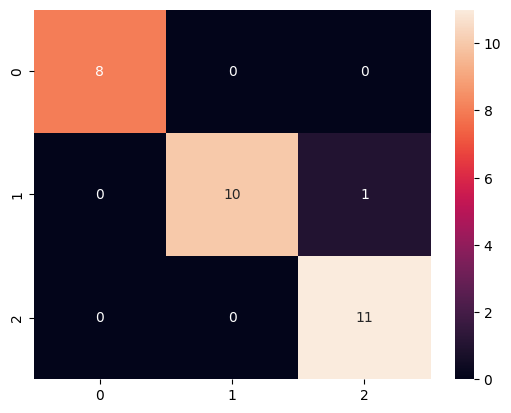

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
confusion_mat = confusion_matrix(Y_test,prediction)
sns.heatmap(confusion_mat, annot=True)
print(classification_report(Y_test,prediction))

**CROSS VALIDATION**

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
X, y = datasets.load_iris(return_X_y=True)
SVM= SVC()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(SVM, X, y, cv = k_folds)
print("Cross Validation Scores: ", list(scores))
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8666666666666667, 0.8, 0.9333333333333333]
Average CV Score:  0.9333333333333333
